# Техническое задание

Автор: Кузьмин Дмитрий

## Задание

Анализ паттернов плохо распознаваемых EEG-файлов:

* Анализ качества сырых данных
* Анализ распределения признаков
* Анализ баланса классов
* Визуальный анализ EEG
* Анализ предсказаний модели

## Ожидаемые результаты

* Таблица QC-метрик для всех файлов проблемных пациентов
* Таблица баланса классов для всех пациентов
* Графики распределений признаков 
* ROC-кривые для проблемных пацфиентов
* Визуализации EEG — примеры preictal окон

In [34]:
import os
import glob
import numpy as np
import pandas as pd
import mne
import seaborn as sns
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## Анализ качества сырых данных

Цель: Выявить проблемы с качеством исходных EEG-записей.

In [35]:
problem_patient = ['chb15', 'chb18', 'chb19']

In [36]:
base_dir = r"C:\Users\_\Desktop\IT\epilepsy\outputs"
tables = []

for edf_file in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, edf_file)
    if not os.path.isdir(folder_path):
        continue
    qc_path = os.path.join(folder_path, "qc_results.csv")
    data = pd.read_csv(qc_path)
    if data['patient'].isin(problem_patient).any():
        continue
    tables.append(data)

qc_normal_patient = pd.concat(tables, ignore_index=True)
qc_normal_patient.to_csv("qc_normal_patient.csv", index=False)

In [37]:
qc_normal_patient[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,570.0,570.000000,570.0,570.000000,570.000000
mean,0.0,0.000786,0.0,0.000035,0.001480
std,0.0,0.010886,0.0,0.000017,0.000540
min,0.0,0.000000,0.0,0.000008,0.000333
25%,0.0,0.000000,0.0,0.000024,0.001109
50%,0.0,0.000000,0.0,0.000031,0.001443
75%,0.0,0.000000,0.0,0.000043,0.001743
max,0.0,0.172414,0.0,0.000162,0.003873


In [38]:
qc_normal_patient

,patient,edf_file,edf_path,sampling_rate,n_channels,n_samples,is_good,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude
0,chb01,chb01_01.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001038
1,chb01,chb01_02.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000021,0.001388
2,chb01,chb01_03.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000031,0.000595
3,chb01,chb01_04.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001286
4,chb01,chb01_05.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,chb24,chb24_13.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001118
566,chb24,chb24_14.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000028,0.001254
567,chb24,chb24_15.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001312
568,chb24,chb24_17.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000039,0.001504


In [39]:
chb15 = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\chb15\qc_results.csv')
chb18 = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\chb18\qc_results.csv')
chb19 = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\chb19\qc_results.csv')

qc_problem_patient = pd.concat([chb15, chb18, chb19], ignore_index=True)
qc_problem_patient.to_csv("qc_problem_patient.csv", index=False)

In [40]:
qc_problem_patient[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,106.0,106.0,106.0,106.000000,106.000000
mean,0.0,0.0,0.0,0.000015,0.001214
std,0.0,0.0,0.0,0.000006,0.000709
min,0.0,0.0,0.0,0.000009,0.000355
25%,0.0,0.0,0.0,0.000012,0.000742
50%,0.0,0.0,0.0,0.000015,0.001007
75%,0.0,0.0,0.0,0.000017,0.001485
max,0.0,0.0,0.0,0.000058,0.005549


In [41]:
qc_normal_patient['group'] = 'Normal'
qc_problem_patient['group'] = 'Problem'

In [42]:
QC_data = pd.concat([qc_normal_patient, qc_problem_patient], ignore_index=True)
QC_data

,patient,edf_file,edf_path,sampling_rate,n_channels,n_samples,is_good,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
0,chb01,chb01_01.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001038,Normal
1,chb01,chb01_02.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000021,0.001388,Normal
2,chb01,chb01_03.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000031,0.000595,Normal
3,chb01,chb01_04.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001286,Normal
4,chb01,chb01_05.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000023,0.001386,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,chb19,chb19_26.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000015,0.001581,Problem
672,chb19,chb19_27.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000022,0.001159,Problem
673,chb19,chb19_28.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,924672,True,0.0,0.0,[],0.0,0.000032,0.002495,Problem
674,chb19,chb19_29.edf,C:\Users\_\Desktop\IT\epilepsy\files\chbmit\1....,256,17,921600,True,0.0,0.0,[],0.0,0.000027,0.002391,Problem


In [43]:
file_index = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\file_index.csv')
seizure_index = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\seizure_index.csv')

In [44]:
seizure_columns = seizure_index.columns.difference(['patient', 'edf_path', 'sampling_rate'])

files_data = pd.merge(
    file_index, 
    seizure_index[seizure_columns], 
    on='edf_file', 
    how='left'
)

files_data = files_data[files_data['num_seizures'] >= 1]

In [45]:
files_data = files_data.drop(['file_end_time', 'file_start_time', 'seizure_id', 'seizures', 'file_exists'], axis=1)

In [46]:
files_data = files_data[['patient', 'edf_file', 'num_seizures', 'start_time', 'end_time', 'onset_sec', 'offset_sec', 'duration_sec', 'sampling_rate', 'channels']]
files_data

,patient,edf_file,num_seizures,start_time,end_time,onset_sec,offset_sec,duration_sec,sampling_rate,channels
2,chb01,chb01_03.edf,1,13:43:04,14:43:04,2996.0,3036.0,40.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
3,chb01,chb01_04.edf,1,14:43:12,15:43:12,1467.0,1494.0,27.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
14,chb01,chb01_15.edf,1,01:44:44,2:44:44,1732.0,1772.0,40.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
15,chb01,chb01_16.edf,1,02:44:51,3:44:51,1015.0,1066.0,51.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
17,chb01,chb01_18.edf,1,04:45:06,5:45:06,1720.0,1810.0,90.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
...,...,...,...,...,...,...,...,...,...,...
728,chb24,chb24_13.edf,1,NaN,NaN,3288.0,3304.0,16.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
729,chb24,chb24_14.edf,1,NaN,NaN,1939.0,1966.0,27.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
730,chb24,chb24_15.edf,1,NaN,NaN,3552.0,3569.0,17.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."
731,chb24,chb24_17.edf,1,NaN,NaN,3515.0,3581.0,66.0,256,"['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3'..."


In [47]:
data = pd.merge(
    file_index,  
    QC_data[['patient', 'edf_file', 'nan_ratio', 'flat_ratio', 'flat_channels', 
             'clipped_ratio', 'mean_amplitude', 'max_amplitude', 'group']],
    on=['patient','edf_file'],
    how='left'   
)
data = data.drop(['seizures', 'channels', 'file_exists', 'sampling_rate', 'edf_path'], axis=1)

In [49]:
data[(data['num_seizures'] >= 1)]

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
2,chb01,chb01_03.edf,13:43:04,14:43:04,1,0.0,0.0,[],0.0,0.000031,0.000595,Normal
3,chb01,chb01_04.edf,14:43:12,15:43:12,1,0.0,0.0,[],0.0,0.000023,0.001286,Normal
14,chb01,chb01_15.edf,01:44:44,2:44:44,1,0.0,0.0,[],0.0,0.000037,0.000736,Normal
15,chb01,chb01_16.edf,02:44:51,3:44:51,1,0.0,0.0,[],0.0,0.000037,0.001218,Normal
17,chb01,chb01_18.edf,04:45:06,5:45:06,1,0.0,0.0,[],0.0,0.000022,0.001019,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
671,chb24,chb24_13.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,0.001118,Normal
672,chb24,chb24_14.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000028,0.001254,Normal
673,chb24,chb24_15.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,0.001312,Normal
674,chb24,chb24_17.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000039,0.001504,Normal


In [50]:
data[['nan_ratio', 'flat_ratio', 'clipped_ratio', 'mean_amplitude', 'max_amplitude']].describe()

,nan_ratio,flat_ratio,clipped_ratio,mean_amplitude,max_amplitude
count,676.0,676.000000,676.0,676.000000,676.000000
mean,0.0,0.000663,0.0,0.000032,0.001439
std,0.0,0.009998,0.0,0.000017,0.000577
min,0.0,0.000000,0.0,0.000008,0.000333
25%,0.0,0.000000,0.0,0.000021,0.001015
50%,0.0,0.000000,0.0,0.000028,0.001373
75%,0.0,0.000000,0.0,0.000040,0.001719
max,0.0,0.172414,0.0,0.000162,0.005549


In [51]:
data[data['flat_ratio'] >= 0.1]

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
343,chb12,chb12_27.edf,16:07:06,17:07:06,6,0.0,0.172414,"[3, 9, 13, 19, 23]",0.0,0.000088,0.003124,Normal
344,chb12,chb12_28.edf,17:07:12,18:07:12,1,0.0,0.137931,"[3, 9, 13, 19]",0.0,0.000090,0.001558,Normal
345,chb12,chb12_29.edf,18:07:19,19:07:43,6,0.0,0.137931,"[3, 9, 13, 19]",0.0,0.000125,0.002300,Normal


In [52]:
data

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,max_amplitude,group
0,chb01,chb01_01.edf,11:42:54,12:42:54,0,0.0,0.0,[],0.0,0.000023,0.001038,Normal
1,chb01,chb01_02.edf,12:42:57,13:42:57,0,0.0,0.0,[],0.0,0.000021,0.001388,Normal
2,chb01,chb01_03.edf,13:43:04,14:43:04,1,0.0,0.0,[],0.0,0.000031,0.000595,Normal
3,chb01,chb01_04.edf,14:43:12,15:43:12,1,0.0,0.0,[],0.0,0.000023,0.001286,Normal
4,chb01,chb01_05.edf,15:43:19,16:43:19,0,0.0,0.0,[],0.0,0.000023,0.001386,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
671,chb24,chb24_13.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,0.001118,Normal
672,chb24,chb24_14.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000028,0.001254,Normal
673,chb24,chb24_15.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,0.001312,Normal
674,chb24,chb24_17.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000039,0.001504,Normal


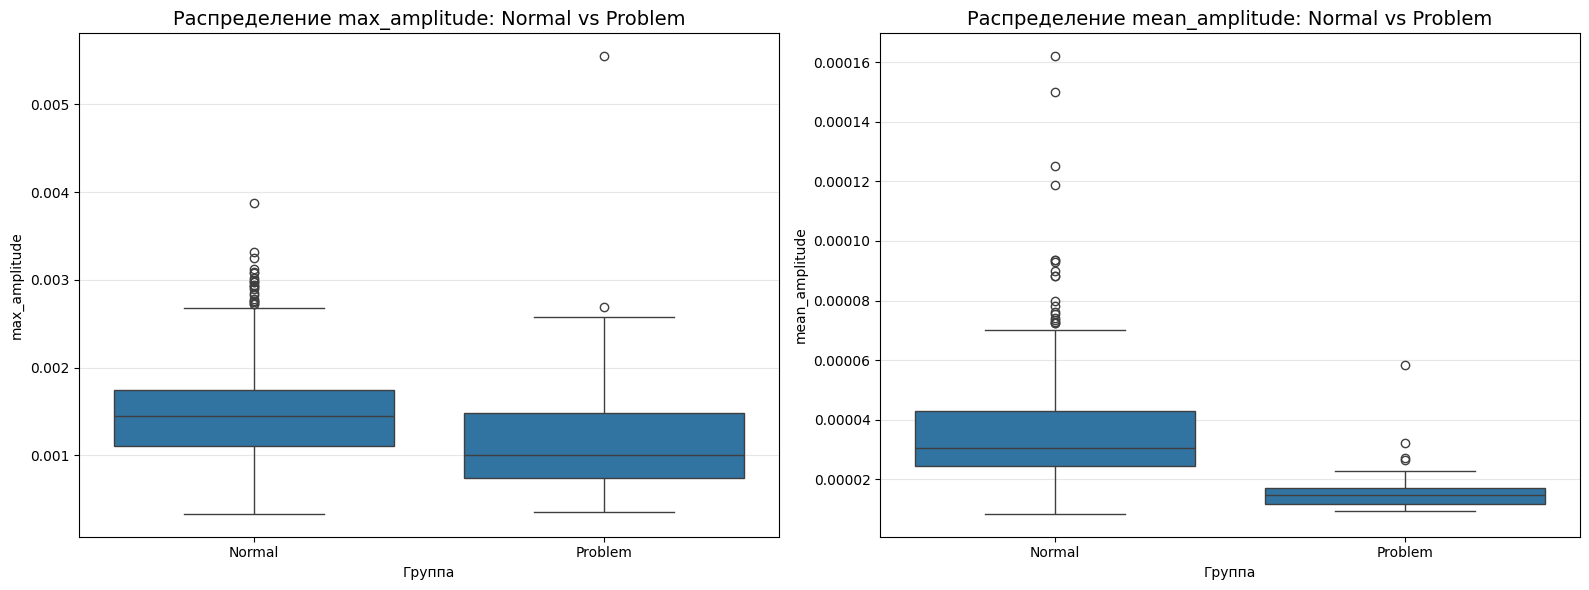

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(
    data=data,
    x='group',
    y='max_amplitude',
    ax=axes[0] 
)
axes[0].set_title('Распределение max_amplitude: Normal vs Problem', fontsize=14)
axes[0].set_xlabel('Группа')
axes[0].set_ylabel('max_amplitude')
axes[0].grid(axis='y', alpha=0.3)

sns.boxplot(
    data=data,
    x='group',
    y='mean_amplitude',
    ax=axes[1] 
)
axes[1].set_title('Распределение mean_amplitude: Normal vs Problem', fontsize=14)
axes[1].set_xlabel('Группа')
axes[1].set_ylabel('mean_amplitude')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


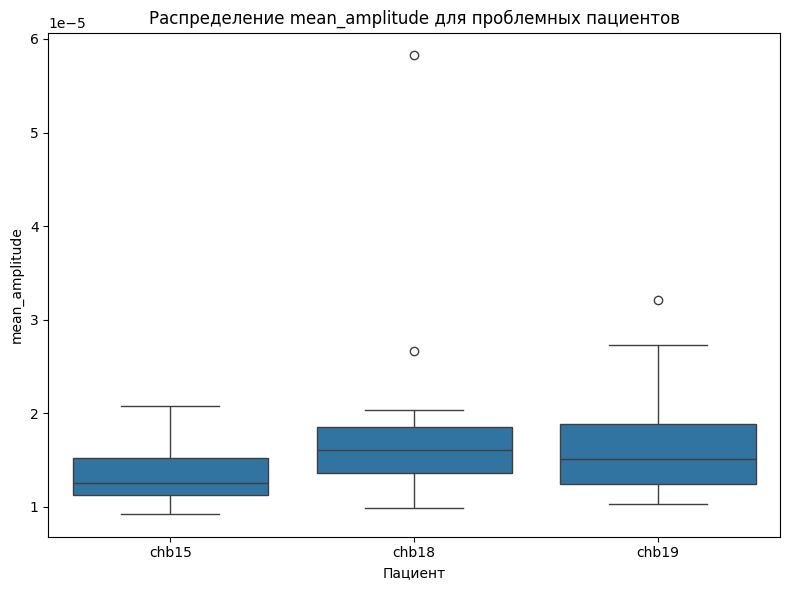

In [54]:
subset = data[data['patient'].isin(problem_patient)]

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=subset,
    x='patient',
    y='mean_amplitude'
)

plt.title('Распределение mean_amplitude для проблемных пациентов')
plt.xlabel('Пациент')
plt.ylabel('mean_amplitude')
plt.tight_layout()
plt.show()

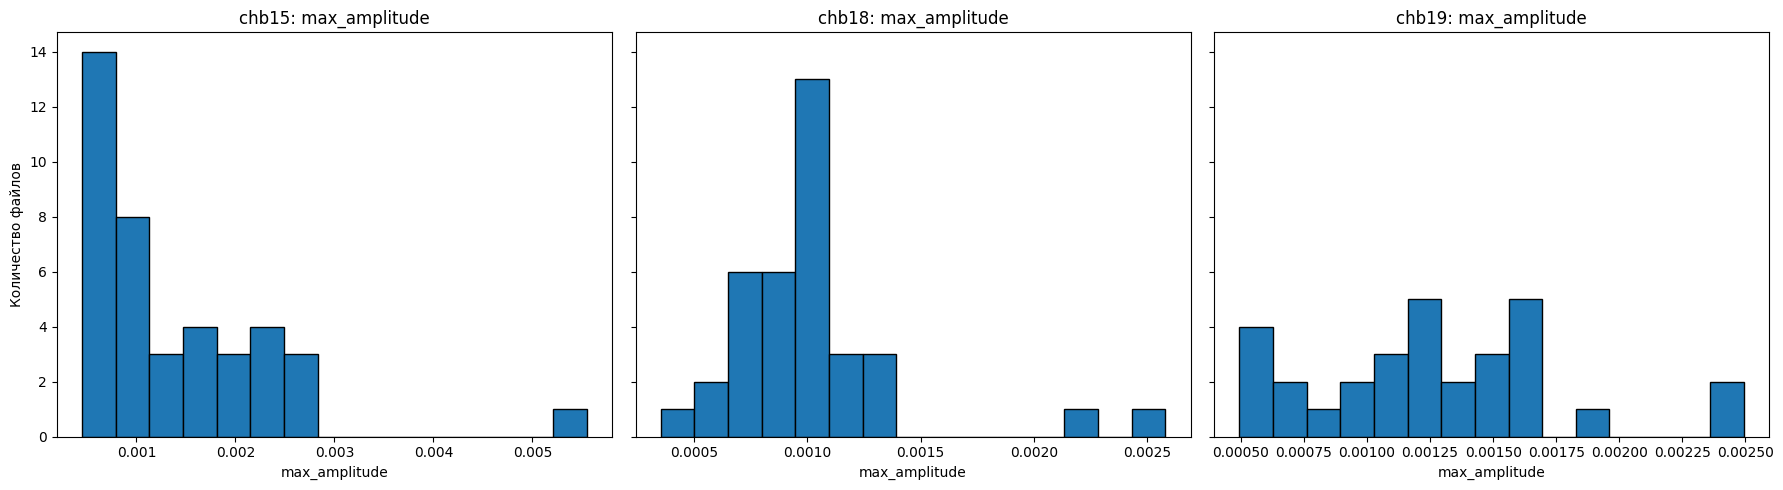

In [55]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, patient in zip(axes, ['chb15', 'chb18', 'chb19']):
    subset = data[data['patient'] == patient]
    ax.hist(subset['max_amplitude'], bins=15, edgecolor='black')
    ax.set_title(f'{patient}: max_amplitude')
    ax.set_xlabel('max_amplitude')
axes[0].set_ylabel('Количество файлов')
plt.tight_layout()
plt.show()

## Анализ распределения признаков

Цель: Сравнить распределения признаков между успешными и проблемными пациентами.

Группы признаков:

*	PSD bands (delta, theta, alpha, beta, gamma) — спектральная мощность
*	Relative power — относительная мощность по диапазонам
*	Statistical (mean, std, skewness, kurtosis) — статистические признаки
*	Hjorth (activity, mobility, complexity) — параметры Хьорта
*	Temporal (line_length, energy) — временные признаки

In [56]:
features = pd.read_csv(r'C:\Users\_\Desktop\IT\epilepsy\outputs\chb07\chb07_features.csv')

meta_cols = ['patient', 'edf_file', 't_start', 't_end', 'label', 'seizure_id']
feature_cols = [c for c in features.columns if c not in meta_cols]
n_features = len(feature_cols)

features

,patient,edf_file,t_start,t_end,0,1,2,3,4,5,...,315,316,317,318,319,320,321,322,label,seizure_id
0,chb07,chb07_01.edf,0.0,4.0,3.591505e-10,4.523986e-11,1.027663e-11,8.084718e-12,3.462220e-12,1.324471e-10,...,0.274901,0.000000,7.276791e-10,0.179191,0.000000,1.036756e-09,0.175720,0.000000,0,0
1,chb07,chb07_01.edf,2.0,6.0,2.780992e-10,3.863516e-11,7.585759e-12,9.528287e-12,7.771021e-12,1.557749e-10,...,0.283340,0.000000,9.368979e-10,0.161622,0.000000,9.857453e-10,0.167371,0.000000,0,0
2,chb07,chb07_01.edf,4.0,8.0,5.745480e-10,2.406599e-10,3.955758e-11,1.176200e-11,9.545614e-12,1.928352e-10,...,0.330530,0.000000,5.199231e-10,0.194584,0.000000,5.640072e-10,0.198179,0.000000,0,0
3,chb07,chb07_01.edf,6.0,10.0,9.104163e-10,2.590206e-10,3.833787e-11,9.373627e-12,6.799992e-12,3.868255e-10,...,0.417060,0.000000,4.620442e-10,0.212621,0.000000,4.455081e-10,0.217976,0.000000,0,0
4,chb07,chb07_01.edf,8.0,12.0,1.292321e-09,1.065413e-10,1.229549e-11,9.577981e-12,6.129391e-12,4.002390e-10,...,0.481607,0.000000,4.718179e-10,0.234417,0.000000,4.147956e-10,0.257608,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107013,chb07,chb07_19.edf,13616.0,13620.0,1.684058e-09,3.575854e-10,1.323341e-11,6.473990e-12,2.898831e-12,2.023870e-10,...,0.289835,0.000000,2.786694e-09,0.216753,3.052333,2.879370e-09,0.215732,3.069098,1,3
107014,chb07,chb07_19.edf,13618.0,13622.0,4.209450e-09,7.362598e-10,6.532343e-11,1.130147e-11,3.507972e-12,8.192853e-10,...,0.287685,0.000000,8.137138e-09,0.188647,3.454844,8.031471e-09,0.191019,3.315569,1,3
107015,chb07,chb07_19.edf,13620.0,13624.0,2.694961e-09,3.917841e-10,5.790150e-11,1.894968e-11,1.550689e-11,6.717242e-10,...,0.306138,0.000000,5.834288e-09,0.182761,3.607790,5.774496e-09,0.180744,3.382506,1,3
107016,chb07,chb07_19.edf,13622.0,13626.0,1.761960e-09,3.073724e-10,2.061946e-11,2.342347e-11,2.842217e-11,3.225181e-10,...,0.349895,2.085155,2.811869e-09,0.217682,3.015513,3.358867e-09,0.192961,3.138098,1,3


In [57]:
psd = ['delta', 'theta', 'alpha', 'beta', 'gamma']
stat_features = ['mean', 'std', 'skewness', 'kurtosis', 'line_length', 'energy']
hjorth_features = ['activity', 'mobility', 'complexity']

n_channels = n_features // 19
print(f"Detected channels: {n_channels}")

Detected channels: 17


In [58]:
feature_names = []

for ch in range(n_channels):
    for band in psd:
        feature_names.append(f'ch{ch}_psd_{band}')

for ch in range(n_channels):
    for band in psd:
        feature_names.append(f'ch{ch}_rel_{band}')

for ch in range(n_channels):
    for stat in stat_features:
        feature_names.append(f'ch{ch}_{stat}')

for ch in range(n_channels):
    for hj in hjorth_features:
        feature_names.append(f'ch{ch}_hjorth_{hj}')

assert len(feature_names) == n_features

rename_map = {
    old: new for old, new in zip(feature_cols, feature_names)
}

features_renamed = features.rename(columns=rename_map)
features_renamed

,patient,edf_file,t_start,t_end,ch0_psd_delta,ch0_psd_theta,ch0_psd_alpha,ch0_psd_beta,ch0_psd_gamma,ch1_psd_delta,...,ch14_hjorth_mobility,ch14_hjorth_complexity,ch15_hjorth_activity,ch15_hjorth_mobility,ch15_hjorth_complexity,ch16_hjorth_activity,ch16_hjorth_mobility,ch16_hjorth_complexity,label,seizure_id
0,chb07,chb07_01.edf,0.0,4.0,3.591505e-10,4.523986e-11,1.027663e-11,8.084718e-12,3.462220e-12,1.324471e-10,...,0.274901,0.000000,7.276791e-10,0.179191,0.000000,1.036756e-09,0.175720,0.000000,0,0
1,chb07,chb07_01.edf,2.0,6.0,2.780992e-10,3.863516e-11,7.585759e-12,9.528287e-12,7.771021e-12,1.557749e-10,...,0.283340,0.000000,9.368979e-10,0.161622,0.000000,9.857453e-10,0.167371,0.000000,0,0
2,chb07,chb07_01.edf,4.0,8.0,5.745480e-10,2.406599e-10,3.955758e-11,1.176200e-11,9.545614e-12,1.928352e-10,...,0.330530,0.000000,5.199231e-10,0.194584,0.000000,5.640072e-10,0.198179,0.000000,0,0
3,chb07,chb07_01.edf,6.0,10.0,9.104163e-10,2.590206e-10,3.833787e-11,9.373627e-12,6.799992e-12,3.868255e-10,...,0.417060,0.000000,4.620442e-10,0.212621,0.000000,4.455081e-10,0.217976,0.000000,0,0
4,chb07,chb07_01.edf,8.0,12.0,1.292321e-09,1.065413e-10,1.229549e-11,9.577981e-12,6.129391e-12,4.002390e-10,...,0.481607,0.000000,4.718179e-10,0.234417,0.000000,4.147956e-10,0.257608,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107013,chb07,chb07_19.edf,13616.0,13620.0,1.684058e-09,3.575854e-10,1.323341e-11,6.473990e-12,2.898831e-12,2.023870e-10,...,0.289835,0.000000,2.786694e-09,0.216753,3.052333,2.879370e-09,0.215732,3.069098,1,3
107014,chb07,chb07_19.edf,13618.0,13622.0,4.209450e-09,7.362598e-10,6.532343e-11,1.130147e-11,3.507972e-12,8.192853e-10,...,0.287685,0.000000,8.137138e-09,0.188647,3.454844,8.031471e-09,0.191019,3.315569,1,3
107015,chb07,chb07_19.edf,13620.0,13624.0,2.694961e-09,3.917841e-10,5.790150e-11,1.894968e-11,1.550689e-11,6.717242e-10,...,0.306138,0.000000,5.834288e-09,0.182761,3.607790,5.774496e-09,0.180744,3.382506,1,3
107016,chb07,chb07_19.edf,13622.0,13626.0,1.761960e-09,3.073724e-10,2.061946e-11,2.342347e-11,2.842217e-11,3.225181e-10,...,0.349895,2.085155,2.811869e-09,0.217682,3.015513,3.358867e-09,0.192961,3.138098,1,3


In [59]:
features = pd.DataFrame()
features[meta_cols] = features_renamed[meta_cols]

# Absolute PSD (delta, theta, alpha, beta, gamma) features
for band in psd:
    cols = [c for c in features_renamed.columns if c.endswith(f'psd_{band}')]
    features[f'psd_{band}'] = features_renamed[cols].mean(axis=1)

# Relative Power features
for band in psd:
    cols = [c for c in features_renamed.columns if c.endswith(f'rel_{band}')]
    features[f'rel_{band}'] = features_renamed[cols].mean(axis=1)

# Statistical features
features['line_length'] = features_renamed.filter(regex='line_length$').mean(axis=1)
features['energy'] = features_renamed.filter(regex='energy$').mean(axis=1)
features['std'] = features_renamed.filter(regex='_std$').mean(axis=1)
features['kurtosis'] = features_renamed.filter(regex='kurtosis$').mean(axis=1)
features['skewness_mean'] = features_renamed.filter(regex='skewness$').mean(axis=1)

# Hjorth param features 
for hj in ['activity', 'mobility', 'complexity']:
    features[f'hjorth_{hj}'] = features_renamed.filter(regex=f'hjorth_{hj}$').mean(axis=1)
    
features.columns

Index(['patient', 'edf_file', 't_start', 't_end', 'label', 'seizure_id',
       'psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma',
       'rel_delta', 'rel_theta', 'rel_alpha', 'rel_beta', 'rel_gamma',
       'line_length', 'energy', 'std', 'kurtosis', 'skewness_mean',
       'hjorth_activity', 'hjorth_mobility', 'hjorth_complexity'],
      dtype='object')

In [60]:
inter = features[features.label == 0]
ictal = features[features.label == 1]

In [61]:
agg_cols = [
    c for c in features.columns
    if c not in ['patient', 'edf_file', 't_start', 't_end', 'label', 'seizure_id']
]

In [62]:
file_inter = (inter.groupby(['patient', 'edf_file'])[agg_cols].agg('mean').add_suffix('_inter'))
file_ictal = (ictal.groupby(['patient', 'edf_file'])[agg_cols].agg('mean').add_suffix('_ictal'))

features = (file_inter.join(file_ictal, how='outer').reset_index())

features.columns = [
    f"{col[0]}_{col[1]}" if isinstance(col, tuple) else col
    for col in features.columns
]

file_features = (features.groupby(['patient', 'edf_file']).agg('mean').reset_index())

In [63]:
data = data.merge(file_features, on=['patient', 'edf_file'], how='left')
data

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,...,rel_beta_ictal,rel_gamma_ictal,line_length_ictal,energy_ictal,std_ictal,kurtosis_ictal,skewness_mean_ictal,hjorth_activity_ictal,hjorth_mobility_ictal,hjorth_complexity_ictal
0,chb01,chb01_01.edf,11:42:54,12:42:54,0,0.0,0.0,[],0.0,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chb01,chb01_02.edf,12:42:57,13:42:57,0,0.0,0.0,[],0.0,0.000021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chb01,chb01_03.edf,13:43:04,14:43:04,1,0.0,0.0,[],0.0,0.000031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chb01,chb01_04.edf,14:43:12,15:43:12,1,0.0,0.0,[],0.0,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chb01,chb01_05.edf,15:43:19,16:43:19,0,0.0,0.0,[],0.0,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,chb24,chb24_13.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,chb24,chb24_14.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,chb24,chb24_15.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,chb24,chb24_17.edf,NaN,NaN,1,0.0,0.0,[],0.0,0.000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
inter = data[data['num_seizures'] == 0]
inter = inter.loc[:, ~inter.columns.str.contains('_ictal')]

ictal = data[data['num_seizures'] > 0]
ictal = ictal.loc[:, ~ictal.columns.str.contains('_inter')]

inter[inter['patient'] == 'chb07']

,patient,edf_file,start_time,end_time,num_seizures,nan_ratio,flat_ratio,flat_channels,clipped_ratio,mean_amplitude,...,rel_beta_inter,rel_gamma_inter,line_length_inter,energy_inter,std_inter,kurtosis_inter,skewness_mean_inter,hjorth_activity_inter,hjorth_mobility_inter,hjorth_complexity_inter
215,chb07,chb07_01.edf,16:58:28,20:58:39,0,0.0,0.0,[],0.0,0.000024,...,0.165820,0.107326,0.007316,2.037362e-06,0.000034,2.683285,0.357617,1.986728e-09,0.336725,0.955813
216,chb07,chb07_02.edf,21:00:13,25:00:13,0,0.0,0.0,[],0.0,0.000022,...,0.128856,0.071807,0.005122,1.457355e-06,0.000029,2.132601,0.255888,1.421199e-09,0.279703,0.395271
217,chb07,chb07_03.edf,01:00:21,5:00:21,0,0.0,0.0,[],0.0,0.000026,...,0.037193,0.007229,0.002811,1.797091e-06,0.000033,1.358544,-0.164936,1.751528e-09,0.129307,0.068681
218,chb07,chb07_04.edf,05:00:29,9:00:29,0,0.0,0.0,[],0.0,0.000023,...,0.076000,0.034571,0.004814,2.670131e-06,0.000030,2.099527,0.024276,2.604715e-09,0.195965,0.282019
219,chb07,chb07_05.edf,09:00:36,13:00:36,0,0.0,0.0,[],0.0,0.000093,...,0.309434,0.202632,0.035100,1.183300e-05,0.000086,1.296574,0.126914,1.154804e-08,0.485129,1.487944
220,chb07,chb07_06.edf,13:00:44,14:22:44,0,0.0,0.0,[],0.0,0.000025,...,0.139611,0.092135,0.007071,2.078740e-06,0.000034,2.986676,0.333306,2.027229e-09,0.314156,0.682753
221,chb07,chb07_07.edf,14:23:26,15:41:06,0,0.0,0.0,[],0.0,0.000018,...,0.115492,0.059328,0.004278,9.778134e-07,0.000024,2.715731,0.380472,9.534256e-10,0.269000,0.197231
222,chb07,chb07_08.edf,15:45:54,19:45:54,0,0.0,0.0,[],0.0,0.000023,...,0.142613,0.098638,0.006256,1.654525e-06,0.000031,3.273842,0.413087,1.613533e-09,0.321066,0.664010
223,chb07,chb07_09.edf,19:45:58,23:45:58,0,0.0,0.0,[],0.0,0.000024,...,0.147564,0.098224,0.006586,1.739075e-06,0.000032,3.314003,0.524299,1.695938e-09,0.323690,0.766016
224,chb07,chb07_10.edf,23:46:06,27:46:06,0,0.0,0.0,[],0.0,0.000029,...,0.056888,0.021646,0.003820,2.288927e-06,0.000037,1.641232,0.019669,2.231223e-09,0.167109,0.204521


## Анализ баланса классов

Цель: Проверить корректность разметки и баланс классов.

Метрики: n_files, n_seizure_files, n_windows, n_preictal, n_interictal, ratio

Результат: Таблица баланса классов для всех пациентов 